# Time Series - ARIMA

**Time series analysis is a statistical method to analyse the past data within a given duration of time to forecast the future. It comprises of ordered sequence of data at equally spaced interval.To understand the time series data & the analysis let us consider an example. Consider an example of Airline Passenger data. It has the count of passenger over a period of time.**

![](https://i.pinimg.com/originals/6e/8a/45/6e8a45b41425813c606412e3b9e78cb8.jpg)

Here the **Objective** is- Build a model to forecast the demand(passenger traffic) in Airplanes. The data is classified in date/time and the passengers travelling per month

**Time Series:**<br>
Time Series is a series of observations taken at particular time intervals (usually equal intervals). Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

**Why & where Time Series is used?**<br>
Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:
1. Business Forecasting
2. Understanding past behavior
3. Plan the future
4. Evaluate current accomplishment

**Importance of Time Series Analysis:**<br>
Ample of time series data is being generated from a variety of fields. And hence the study time series analysis holds a lot of applications. Let us try to understand the importance of time series analysis in different areas.
1. Economics
2. Finance
3. Healthcare
4. Environmental Science
5. Sales Forecasting

**What are the components of Time Series?**<br>
There are 4 components:
**1. Trend** - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.
**2. Seasonality** - seasonal variances. Eq: Ice cream sales increases in Summer only
**3. Noise or Irregularity** - Spikes & troughs at random intervals
**4. Cyclicity** - behavior that repeats itself after large interval of time, like months, years etc.

**What is Stationarity?**<br>
Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,
1. It should have constant mean.
2. It should have constant variance or standard deviation.
3. Auto-covariance should not depend on time.

Trend & Seasonality are two reasons why a Time Series is not stationary.

**Why does Timeseries has to be Stationary?**<br>
Stationary data means mean and standard deviation of data does not change WRT time. The mean across many time periods is only informative if the expected value is the same across those time periods. We make the data stationary in case of ARIMA because the arima model looks at the past data to predict the future values.

**Tests to check if a series is stationary or not:**<br>
There are 2 ways to check for Stationarity of a Timeseries:<br>
**1. Rolling Statistics** - Plot the moving avg(mean) or moving standard deviation to see if it varies with time. It is a visual technique.<br>
**2. ADCF Test** - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a Timeseries is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

**What Is ADCF test?**<br>
In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models.

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

p value(0<=p<=1) should be as low as possible. Critical values at different confidence intervals should be close to the Test statistics value.

**What is ARIMA model?**<br>
ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags), d(order of differentiation) and Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.

**How to find value of P & Q for ARIMA ?**<br>
We need to take help of **ACF(Auto Correlation Function)** & **PACF(Partial Auto Correlation Function)** plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.
From PACF(at y=0), get P
From ACF(at y=0), get Q

**What is Exponential Smoothing?**<br>
Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data.

**Loading the basic libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

**Loading AirPassenger data set**

In [2]:
mypath =  r'G:\My Drive\Dropbox\IIM-Aditya\Teaching\Executive courses\MSDSM -Business Analytics\codes\TSA&F\\'

data = pd.read_csv(mypath+ r'AirPassengers.csv')

In [4]:
airpass = data

**Let's check first 5 and last 5 records of data set**

In [5]:
airpass.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
airpass.tail(5)

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


**Let's rename "#Passengers", seems really annoying the column name.**

In [7]:
airpass.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [8]:
airpass.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
airpass.shape

(144, 2)

In [9]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**There are 144 records in 2 datasets and 2 columns. There are no null records present. But, look at the Month column. We need to convert them in to datetime datatype.**

In [10]:
from datetime import datetime
airpass['Month']=pd.to_datetime(airpass['Month'],infer_datetime_format=True)

In [11]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


**Now, we will need to index Month column.**

In [12]:
airpassind = airpass.set_index('Month',inplace=False)

In [13]:
airpassind.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Let's plot the data**

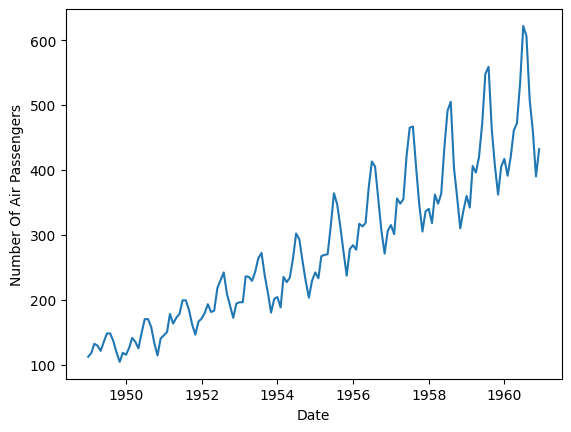

In [14]:
plt.xlabel('Date')
plt.ylabel('Number Of Air Passengers')
plt.plot(airpassind)

**From the above below, we can see that there is a Trend compoenent in the series. Hence, we now check for stationarity of the data.**

**Let's make one function consisting of stationary data checking and ADCF test working. Because we will need to repeat the steps many times, therefore, making function will become very handy**

In [15]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    airpass_test = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(airpass_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in airpass_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

**Let's determine & plot rolling statistics.**

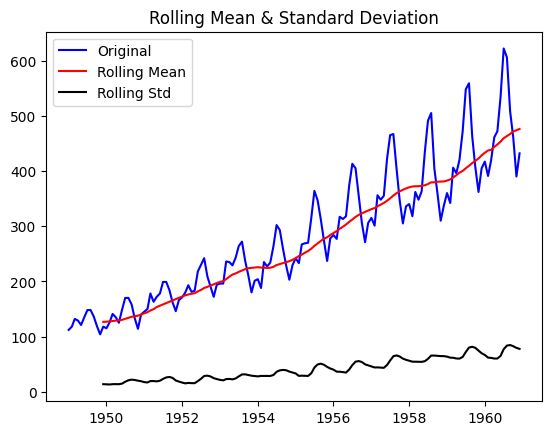

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
test_stationarity(airpassind)

**From above plot, we can see that Rolling Mean itself has a trend component even though Rolling Standard Deviation is fairly constant with time.**

**For time series to be stationary, we need to ensure that both Rolling Mean and Rolling Standard Deviation remain fairly constant WRT time.**

**Both the curves needs to be parallel to X-Axis, in our case it is not so.**

**We've also conducted the ADCF ie Augmented Dickey Fuller Test. Having the Null Hypothesis to be Time Series is Non Stationary.**

For a Time series to be stationary, the ADCF test should have:

1. p-value should be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we can see that p-value(near to 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is **NOT STATIONARY**

### **Data Transformation To Achieve Stationarity**

**Now, we will have to perform some data transformation to achieve Stationarity. We can perform any of the transformations like taking log scale, square, square root, cube, cube root, time shift, exponential decay, etc.**

**Let's perform Log Transformation.**

**Basically we need to remove the trend component.**

In [16]:
airpass_log = np.log(airpassind)

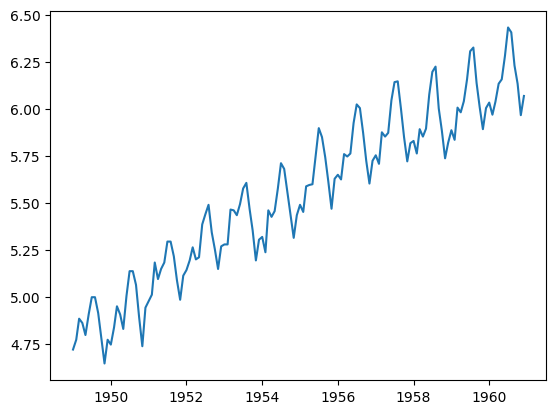

In [17]:
plt.plot(airpass_log)

**Working on Rolling stats seperately (not using function) because we would need Rolling stats separately for computing**

In [18]:
rollmean_log = airpass_log.rolling(window=12).mean()
rollstd_log = airpass_log.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

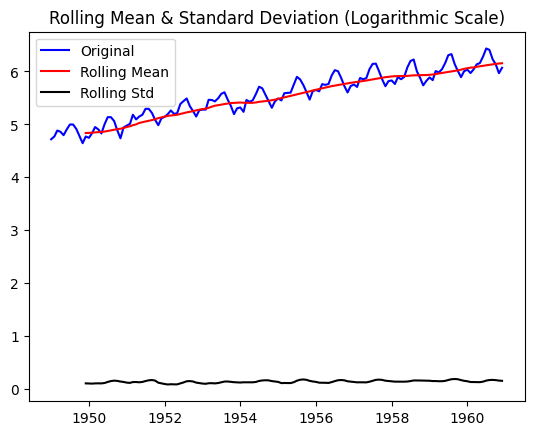

In [19]:
plt.plot(airpass_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

From above graph we can say that, we slightly bettered our previous results. Now, we are heading into the right direction.

From the above graph, Time series with log scale as well as Rolling Mean(moving avg) both have the trend component. Thus subtracting one from the other should remove the trend component.

**R (result) = Time Series Loca Scale - Rolling Mean Log Scale -> this can be our final non trend curve**

In [20]:
airpass_new = airpass_log - rollmean_log

In [23]:
airpass_new.tail()

,Passengers
Month,
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230
1960-11-01,-0.182690
1960-12-01,-0.085789


In [24]:
airpass_new.dropna(inplace=True)

In [24]:
airpass_new.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


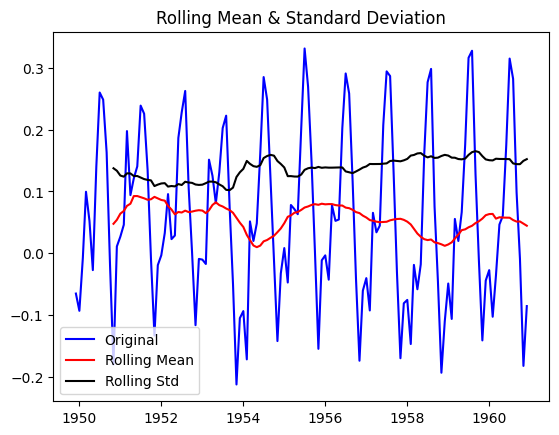

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [25]:
test_stationarity(airpass_new)

**From the above plot, we came to know that "indeed subtracting two related series having similar trend components actually removed trend and made the dataset stationary"**

Also, after concluding the results from ADFC test:

1. p-value has reduced from 0.99 to 0.022
2. Critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic

So we can now say that given series is now **STATIONARY**

### **Time Shift Transformation**

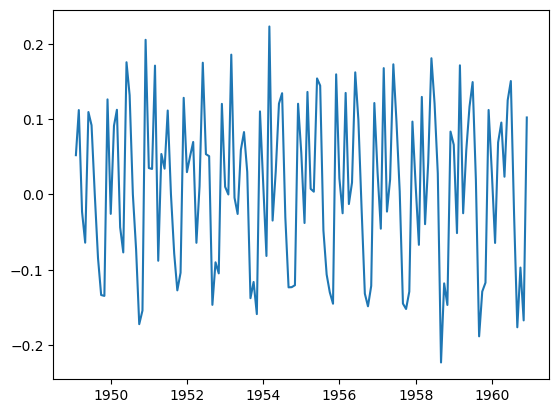

In [26]:
airpass_log_diff = airpass_log - airpass_log.shift()
plt.plot(airpass_log_diff)

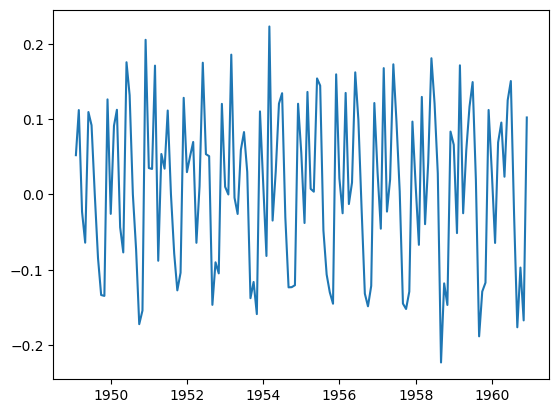

In [27]:
airpass_log_diff.dropna(inplace=True)
plt.plot(airpass_log_diff)

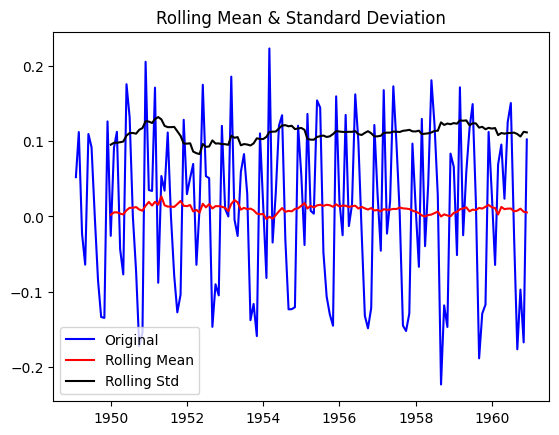

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [28]:
test_stationarity(airpass_log_diff)

From above plot, we can see that, visually this is the very best result as our series along with rolling stats values of moving avg(mean) & moving standard deviation is very much flat & stationary. 

But, the ADCF test shows us that:

1. p-value of 0.07 is not as good as 0.02 of previous instance.
2. Test Statistic value not as close to the critical values as that of previous instance.

**Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.**

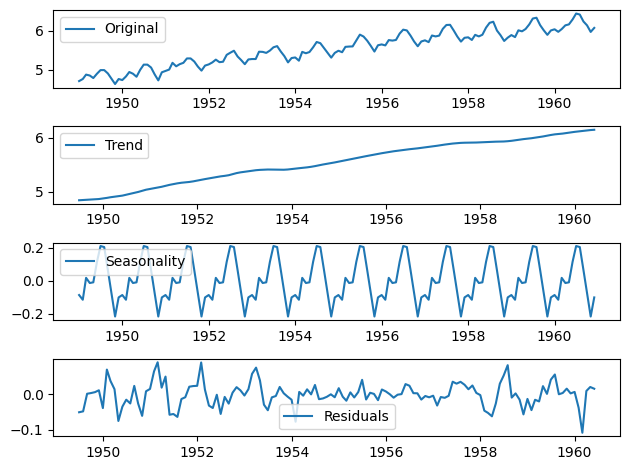

In [29]:
decomposition = seasonal_decompose(airpass_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(airpass_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**There can be cases where an observation simply consist of trend & seasonality. In that case, there won't be any residual component & that would be a null or NaN. Hence, we also remove such cases.**

In [30]:
airpass_decompose = residual
airpass_decompose.dropna(inplace=True)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

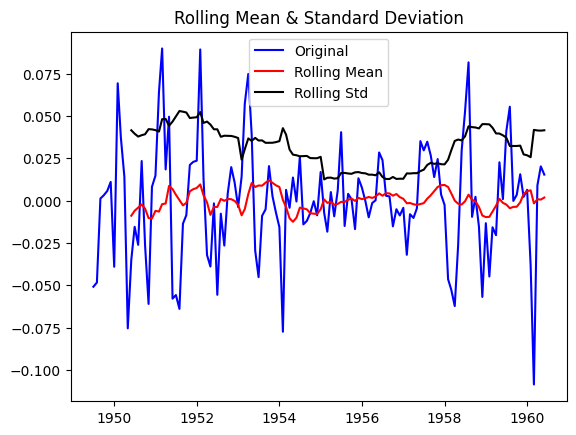

In [31]:
rollmean_decompose = airpass_decompose.rolling(window=12).mean()
rollstd_decompose = airpass_decompose.rolling(window=12).std()

plt.plot(airpass_decompose, color='blue', label='Original')
plt.plot(rollmean_decompose, color='red', label='Rolling Mean')
plt.plot(rollstd_decompose, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

### **Plotting ACF & PACF**

In [32]:
lag_acf = acf(airpass_log_diff, nlags=20)
lag_pacf = pacf(airpass_log_diff, nlags=20, method='ols')

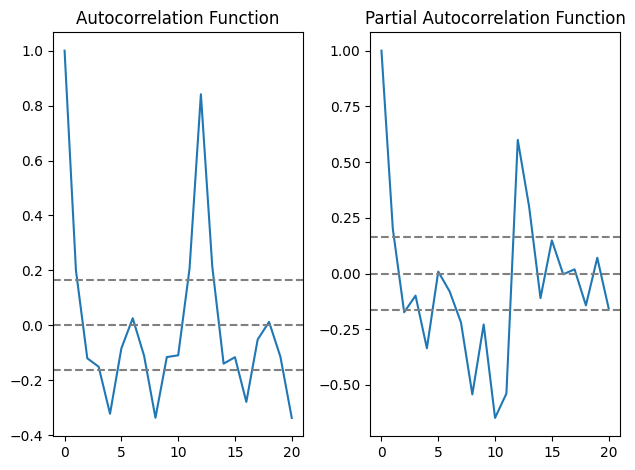

In [33]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(airpass_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(airpass_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(airpass_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(airpass_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

From the ACF graph, we can see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 
From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

**ARIMA is AR + I + MA.** Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower the RSS values indicates a better model.

### **AR Model**
Making order = (2,1,0)

c:\Users\adityam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\adityam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\adityam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


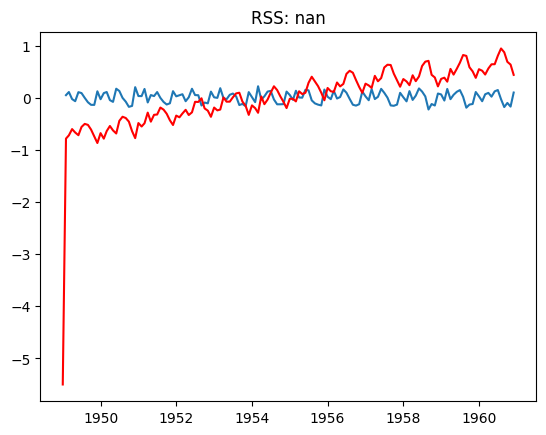

In [34]:
model1 = ARIMA(airpass_log, order=(2,1,0))
results_AR = model1.fit()
plt.plot(airpass_log_diff)
plt.plot(results_AR.fittedvalues-np.mean(results_AR.fittedvalues), color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - airpass_log_diff['Passengers'])**2))
print('Plotting AR model')

### **MA Model**
Making order = (0,1,2)

In [56]:
results_MA.fittedvalues

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.778410
1949-04-01    4.889529
1949-05-01    4.826773
                ...   
1960-08-01    6.422390
1960-09-01    6.367960
1960-10-01    6.202651
1960-11-01    6.156080
1960-12-01    5.941235
Length: 144, dtype: float64

c:\Users\adityam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\adityam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\adityam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting MA model


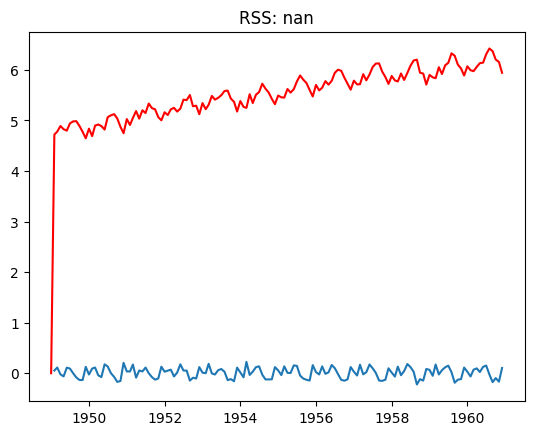

In [35]:
model2 = ARIMA(airpass_log, order=(0,1,2))
results_MA = model2.fit()
plt.plot(airpass_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - airpass_log_diff['Passengers'])**2))
print('Plotting MA model')

### **AR+I+MA = ARIMA Model**
Making order = (2,1,2)

Plotting ARIMA model


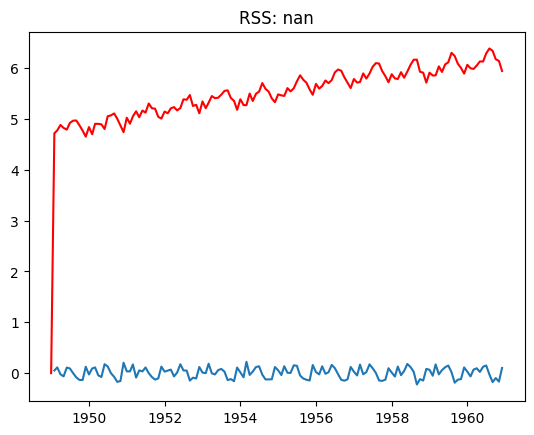

In [54]:
model = ARIMA(airpass_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(airpass_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - airpass_log_diff['Passengers'])**2))
print('Plotting ARIMA model')

**RSS value for:**
AR Model - 1.5023
MA Model - 1.4721

ARIMA Model - 1.0292

By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 1.0292, indicating ARIMA to be better than its individual component models.

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data.

### **Prediction & Reverse Transformation**

In [43]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776386
1949-04-01    4.883218
1949-05-01    4.824421
dtype: float64

In [44]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494885
1949-04-01    14.378103
1949-05-01    19.202524
dtype: float64

In [45]:
predictions_ARIMA_log = pd.Series(airpass_log['Passengers'].iloc[0], index=airpass_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213384
1949-04-01    19.096602
1949-05-01    23.921023
dtype: float64

### **Inverse of log is exp**

In [50]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)


Error in callback <function _draw_all_if_interactive at 0x0000022B14BCA980> (for post_execute):


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

<Figure size 640x480 with 1 Axes>

In [51]:
predictions_ARIMA

Month
1949-01-01    1.120000e+02
1949-02-01    1.254400e+04
1949-03-01    1.488655e+06
1949-04-01    1.965844e+08
1949-05-01    2.447758e+10
                  ...     
1960-08-01             inf
1960-09-01             inf
1960-10-01             inf
1960-11-01             inf
1960-12-01             inf
Length: 144, dtype: float64

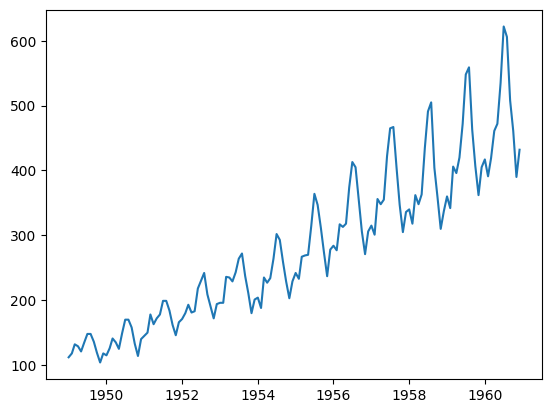

In [49]:
plt.plot(airpassind)


**From above plot, we can see that our predicted forecasts are very close to the real time series values. It also indicates a fairly accurate model.**

In [52]:
airpass_log.head()

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


**We have 144 (existing data of 12 yrs in months) data points. 
Now, we want to forecast for additional 10 yrs (10x12 months=120 data points).**

**144+120 = 264 records/data points**

In [53]:
results_ARIMA.plot_predict(1,264)

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'